# Introduction to TauREx 3

We will use this notebooks to introduce ourselves to the TauREx platform. For this introduction we will go through the basics of:

- Installing ``taurex``
- Acquiring some opacity data
- Creating a model
- Running the model


First, installing taurex is simply done like so:

In [ ]:
!pip install taurex

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.5/47.5 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.7/236.7 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 3.7 MB/s eta 0:00:00
  Created wheel for nestle: filename=nestle-0.2.0-py3-none-any.whl size=12437 sha256=3cdd3db91504c6b6776bd2835a552b1557aeb155ea24e40c3b6aea63f30b2f71
  Stored in directory: /root/.cache/pip/wheels/98/62/75/b799a307e28a8e3ecb89add8c3f917c3a2eb0b880f182597a0
  Created wheel for pylightcurve: filename=pylightcurve-4.0.4-py3-none-any.whl size=39344 sha256=850c432fd3f539f82a4fefd84db1af9a6bfa94880aff24c0b8e6eb62aee2e212
  Stored in directory: /root/.cache/pip/wheels/26/1e/67/d33e1ac5cd1a43aee19ce2c552dc80d2aa424035580bcefe70
Successfully built nestle pylightcurve


Checking its version it a good way to see if its installed:

In [ ]:
import taurex
taurex.__version__

'3.2.0'

If you have any warnings don't worry, these are optional features that can be enabled by installing extra libraries.

Now before we move on we should get some opacity data.

# Opacities

Opacities describe optical behaviour of some physical property in the atmosphere. Some can be computed while others must be loaded in.
The main opacities used in TauREx are molecular absorption cross-sections.

These require computation from a molecular line-list such as those from the [ExoMol](https://www.exomol.com) project but thankfully these generous people have computed some already for use.

TauREx supports many formats


For our purposes we will be using 4 molecules:

- $H_2O$ from [POZAKATEL linelist](https://exomol.com/data/molecules/H2O/1H2-16O/POKAZATEL/)
- $CH_4$ from [MM linelist](https://exomol.com/data/molecules/CH4/12C-1H4/MM/)
- $NH_3$ from [CoYuTe linelist](https://exomol.com/data/molecules/NH3/14N-1H3/CoYuTe/)
- $CO_2$ from [UCL-4000 linelist](https://exomol.com/data/molecules/CO2/12C-16O2/UCL-4000/)

*Please make sure you site the linelists individually if you use them for your work*

In [ ]:
!mkdir xsec/

#### Exomol H2O ####
! wget https://exomol.com/db/H2O/1H2-16O/POKAZATEL/1H2-16O__POKAZATEL__R15000_0.3-50mu.xsec.TauREx.h5 -P ./xsec/
#### Exomol CH4 ####
! wget https://exomol.com/db/CH4/12C-1H4/MM/12C-1H4__MM.R15000_0.3-50mu.xsec.TauREx.h5 -P ./xsec
#### Exomol NH3 ####
! wget https://exomol.com/db/NH3/14N-1H3/CoYuTe/14N-1H3__CoYuTe.R15000_0.3-50mu.xsec.TauREx.h5 -P ./xsec/
#### Exomol CO2 ####
! wget https://exomol.com/db/CO2/12C-16O2/UCL-4000/12C-16O2__UCL-4000.R15000_0.3-50mu.xsec.TauREx.h5 -P ./xsec/

--2025-02-12 12:22:22--  https://exomol.com/db/H2O/1H2-16O/POKAZATEL/1H2-16O__POKAZATEL__R15000_0.3-50mu.xsec.TauREx.h5
Resolving exomol.com (exomol.com)... 128.40.3.60
Connecting to exomol.com (exomol.com)|128.40.3.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 365310072 (348M)
Saving to: ‘./xsec/1H2-16O__POKAZATEL__R15000_0.3-50mu.xsec.TauREx.h5’

1H2-16O__POKAZATEL_ 100%[===================>] 348.39M  29.8MB/s    in 12s     

2025-02-12 12:22:34 (28.5 MB/s) - ‘./xsec/1H2-16O__POKAZATEL__R15000_0.3-50mu.xsec.TauREx.h5’ saved [365310072/365310072]

--2025-02-12 12:22:34--  https://exomol.com/db/CH4/12C-1H4/MM/12C-1H4__MM.R15000_0.3-50mu.xsec.TauREx.h5
Resolving exomol.com (exomol.com)... 128.40.3.60
Connecting to exomol.com (exomol.com)|128.40.3.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 365310264 (348M)
Saving to: ‘./xsec/12C-1H4__MM.R15000_0.3-50mu.xsec.TauREx.h5’

12C-1H4__MM.R15000_ 100%[===================>] 348.39M 

Additionally we will also like to include conditionally induced absorption. We will grab these from the [HITRAN](https://hitran.org/) database. Specifically $H_2-H_2$ and $H_2-He$ pairs.

In [ ]:
!mkdir cia

!wget https://hitran.org/data/CIA/H2-H2_2011.cia -P ./cia
!wget https://hitran.org/data/CIA/H2-He_2011.cia -P ./cia



--2025-02-12 12:24:58--  https://hitran.org/data/CIA/H2-H2_2011.cia
Resolving hitran.org (hitran.org)... 131.142.195.62
Connecting to hitran.org (hitran.org)|131.142.195.62|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24824179 (24M)
Saving to: ‘./cia/H2-H2_2011.cia’

H2-H2_2011.cia      100%[===================>]  23.67M  37.3MB/s    in 0.6s    

2025-02-12 12:24:59 (37.3 MB/s) - ‘./cia/H2-H2_2011.cia’ saved [24824179/24824179]

--2025-02-12 12:24:59--  https://hitran.org/data/CIA/H2-He_2011.cia
Resolving hitran.org (hitran.org)... 131.142.195.62
Connecting to hitran.org (hitran.org)|131.142.195.62|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 146854122 (140M)
Saving to: ‘./cia/H2-He_2011.cia’

H2-He_2011.cia      100%[===================>] 140.05M  53.4MB/s    in 2.6s    

2025-02-12 12:25:02 (53.4 MB/s) - ‘./cia/H2-He_2011.cia’ saved [146854122/146854122]



# Loading in our opacities

TauREx makes use of an automated opacity loader. By pointing to a directory, TauREx will attempt to discover, determine the filetype and identify the molecule. For molecular cross-sections, TauREx supports:

- Legacy TauREx 2 ``pickle`` format
- [ExomolOP](https://www.aanda.org/articles/aa/full_html/2021/02/aa38350-20/aa38350-20.html) HDF5 format.
- [ExoTransmit](https://github.com/elizakempton/Exo_Transmit) format

Additionally, some ``plugins`` can extend the formats that can be used.

For CIA we support:

- Legacy TauREx 2 ``.db`` format
- HITRAN ``.cia`` format

To load in our opacities we can make use of the ``OpacityCache`` and ``CIACache`` objects and point them to our folders.

In [ ]:
from taurex.cache import OpacityCache, CIACache

OpacityCache().set_opacity_path('./xsec/')
CIACache().set_cia_path('./cia/')


🚀 **TIP**
``OpacityCache`` and ``CIACache`` are actually [Singletons](https://en.wikipedia.org/wiki/Singleton_pattern). This means that calling their constructor will always return the same object!

Now we can see what the ``OpacityCache`` has found:

In [ ]:
OpacityCache().find_list_of_molecules()

{'CH4', 'CO2', 'H2O', 'NH3'}

Our molecules were found! Great! Now we can move on to building our model

# Building models

TauREx constructs a simulation by putting together pieces to form a complete model.

The baseline TauREx can build three types of models:

- [TransmissionModel](https://taurex3.readthedocs.io/en/latest/api/taurex.model.html#taurex.model.transmission.TransmissionModel) - Transit spectral modelling
- [EmissionModel](https://taurex3.readthedocs.io/en/latest/api/taurex.model.html#taurex.model.emission.EmissionModel) - Eclipse spectral modelling
- [DirectImageModel](https://taurex3.readthedocs.io/en/latest/api/taurex.model.html#taurex.model.directimage.DirectImageModel) - Direct Imaging model

In order to accomplish this, we need to build some of the pieces first:

1. Temperature Model
2. Pressure Model
3. Chemical Model
4. Optical depth Model.
5. Planet
6. Star


## Temperature model

Vanilla TauREx 3 has a few temperature models available:

- ``Isothermal``
- [Guillot2010](https://www.aanda.org/articles/aa/abs/2010/12/aa13396-09/aa13396-09.html)
- ``NPoint``
- ``TemperatureFile``

All of them exist under the ``taurex.temperature`` module. Lets load up an ``Isothermal`` model and see how we create a profile that is a constant $2000~K$ along the atmosphere.

In [ ]:
from taurex.temperature import Isothermal

iso_t = Isothermal(T=2000.0)

Easy! Other profiles can be created the same way. You can always ask for help if you want to understand how to build one of them:

In [ ]:
from taurex.temperature import Guillot2010

Guillot2010?

## Pressure Profiles

Currently TauREx supports 2 types of pressure profiles:

- ``SimplePressureProfile``
- ``FilePressure``

The ``SimplePressureProfile`` profile simply builds a pressure profile equally spaced in the log scale.

Units are in $Pa$

In [ ]:
from taurex.pressure import SimplePressureProfile

press = SimplePressureProfile(
    nlayers=100,
    atm_min_pressure=1e-5,
    atm_max_pressure=1e5
)


## Chemistry Model

Baseline TauREx only has two chemical models:

- ``TaurexChemistry``
- ``ChemistryFile``

In particular ``TaurexChemistry`` is a model that allows for the free determination of chemical profiles for our chosen molecules.

We define **fill gases** which will be used to fill up the remaining atmosphere after we include our molecules.

The ratio is used if we have more that one fill gas.

In [ ]:
from taurex.chemistry import TaurexChemistry

chemistry = TaurexChemistry(fill_gases=["H2", "He"], ratio=0.1756)

### Adding molecules

Now we can start adding molecules, ``TaurexChemistry`` has the ``addGas`` method which can be used to insert molecules into the chemical model. We can use the ``ConstantGas`` profile but there is the ``TwoLayerGas`` available as well.

TauREx uses *volume mixing ratio (VMR)*

In [ ]:
from taurex.chemistry import ConstantGas

gas = ConstantGas(molecule_name="H2O", mix_ratio=1e-3)
chemistry.addGas(gas)

We can also create it on the spot:

In [ ]:
chemistry.addGas(ConstantGas(molecule_name="CH4", mix_ratio=1e-4))

And also chain ``addGas`` calls:

In [ ]:
chemistry.addGas(ConstantGas(molecule_name="NH3", mix_ratio=1e-4)).addGas(ConstantGas(molecule_name="CO2", mix_ratio=1e-4))
#

Now chemistry has an interesting property. There is an ``activeGases`` and ``inactiveGases``

*Active Gases:*
- Have molecular cross-sections loaded in

*Inactive Gases:*
- Do not have molecular cross-sections

Now inactive does not mean they are completely spectrscopically inactive (as they may come in the form of CIA or rayleigh).

We can check them with these properties:

In [ ]:
chemistry.inactiveGases, chemistry.activeGases

(('H2', 'He'), ('H2O', 'CH4', 'NH3', 'CO2'))

Our chemistry is setup!

# Star and Planet

TauRex requires information about the planet and star in the system in order to simulate the spectra.
The planet contains properties such as:
- Mass ($M_{jup}$)
- Radius ($R_{jup}$)
- Semi-Major Axis ($AU$)
- Impact parameter
- Orbital Period ($day$)
- Albedo
- Transit time ($s$)

Not all of these are required for a particular spectrum. For example, transits only require ``mass`` and ``radius`` to be defined.

Lets create our favourite planet HD 209458 b

In [ ]:
from taurex.planet import Planet

planet = Planet(planet_mass=0.74, planet_radius=1.38)


For the star we can choose between:

- ``BlackbodyStar``
- ``PhoenixStar``

For this purpose we will stick with the ``BlackbodyStar`` as we do not possess the pre-requisite PHOENIX spectrum yet.

With the star we can define these properties:

- Effective Temperaure ($K$)
- Radius ($R_{sun}$)
- Distance ($pc$)
- Mass ($M_{sun}$)
- metallicity ($Z_{sun}$)

Again for our purposes, only ``temperature`` and ``radius`` are needed for transits and eclipse. Direct image requires the ``distance`` parameter.

In [ ]:
from taurex.stellar import BlackbodyStar

star = BlackbodyStar(temperature=6117, radius=1.16)

## Putting it together!

Now we have all of the pieces, we can put them together into a single model.

Lets build a transit model and try it out!

In [ ]:
from taurex.model import TransmissionModel
tm = TransmissionModel(planet=planet,
                       temperature_profile=iso_t,
                       chemistry=chemistry,
                       star=star,
                        pressure_profile=press)

At this point our atmosphere has profiles but no physics! We can add this by including some contributions. Lets add in Absorption:

In [ ]:
from taurex.contributions import AbsorptionContribution
tm.add_contribution(AbsorptionContribution())

Great! No all we have to do is build it:

In [ ]:
tm.build()

``build`` only needs to be done once if none of the models have changed. If you have replaced them then ``build`` needs to be run again.

Now we can actually run our model! The inital run may take a while as data is loaded in:

In [ ]:
wngrid, rprs, tau, _ = tm.model()

Running it again is much faster!

In [ ]:
wngrid, rprs, tau, _ = tm.model()

The output spectral grid is in *wavenumbers* ($cm^{-1}$). We can convert it into wavelength like so:

In [ ]:
wlgrid = 10000/wngrid[::-1]
rprs = rprs[::-1]

Lets plot the results!

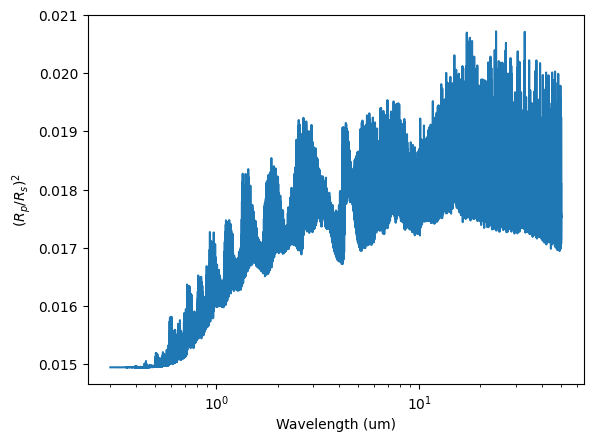

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(wlgrid, rprs)
plt.xlabel("Wavelength (um)")
plt.ylabel("$(R_p/R_s)^2$")
plt.xscale("log")

Of course we would like to add some other radiative effects. Lets put in CIA and see what happens:

In [ ]:
from taurex.contributions import CIAContribution
tm.add_contribution(CIAContribution(cia_pairs=['H2-H2','H2-He']))

tm.build()

In [ ]:
wngrid, rprs, tau, _ = tm.model()

wlgrid = 10000/wngrid[::-1]
rprs = rprs[::-1]

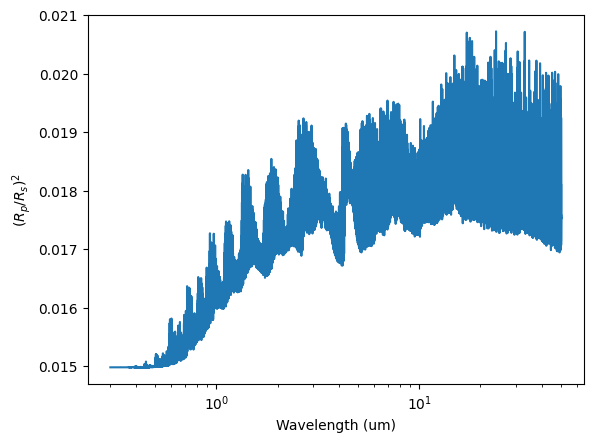

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(wlgrid, rprs)
plt.xlabel("Wavelength (um)")
plt.ylabel("$(R_p/R_s)^2$")
plt.xscale("log")

Its subtle but there is a difference, we can see something more dramatic with Rayleigh:

In [ ]:
from taurex.contributions import RayleighContribution
tm.add_contribution(RayleighContribution())

tm.build()

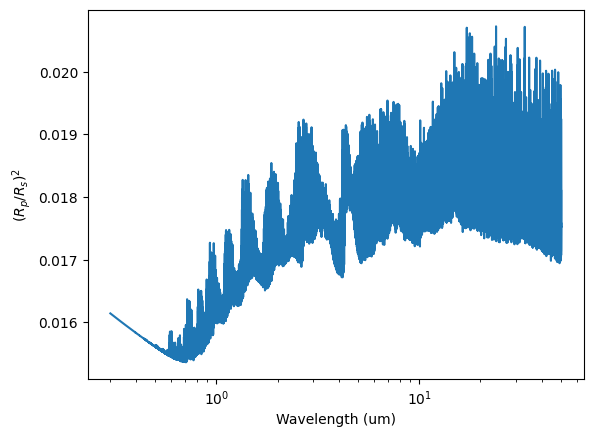

In [ ]:
wngrid, rprs, tau, _ = tm.model()

wlgrid = 10000/wngrid[::-1]
rprs = rprs[::-1]

plt.figure()
plt.plot(wlgrid, rprs)
plt.xlabel("Wavelength (um)")
plt.ylabel("$(R_p/R_s)^2$")
plt.xscale("log")

Ahh yes the distinctive slope!

Lets try using the same objects with Emission:

In [ ]:
from taurex.model import EmissionModel

em = EmissionModel(
    planet=planet,
    temperature_profile=iso_t,
    chemistry=chemistry,
    star=star,
    pressure_profile=press,
)

em.add_contribution(AbsorptionContribution())
em.add_contribution(CIAContribution(cia_pairs=['H2-H2','H2-He']))
em.add_contribution(RayleighContribution())

em.build()

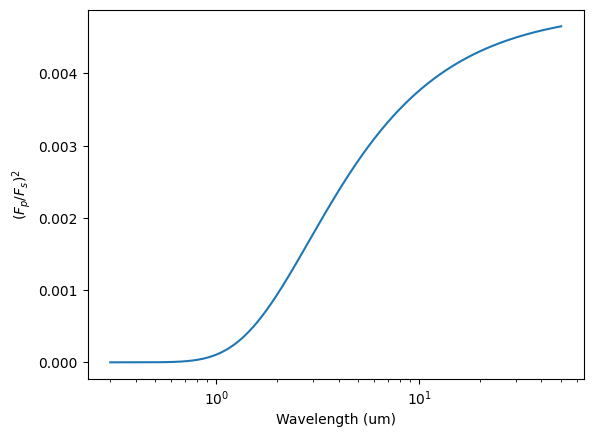

In [ ]:
wngrid, fpfs, tau, _ = em.model()

wlgrid = 10000/wngrid[::-1]
fpfs = fpfs[::-1]

plt.figure()
plt.plot(wlgrid, fpfs)
plt.xlabel("Wavelength (um)")
plt.ylabel("$(F_p/F_s)^2$")
plt.xscale("log")

Ahhh of course, an isothermal will lead to a blackbody spectrum! Okay lets replace the temperature profile with something less constant:

In [ ]:
from taurex.model import EmissionModel
from taurex.temperature import Guillot2010

em = EmissionModel(
    planet=planet,
    temperature_profile=Guillot2010(T_irr=1500),
    chemistry=chemistry,
    star=star,
    pressure_profile=press,
)

em.add_contribution(AbsorptionContribution())
em.add_contribution(CIAContribution(cia_pairs=['H2-H2','H2-He']))
em.add_contribution(RayleighContribution())

em.build()

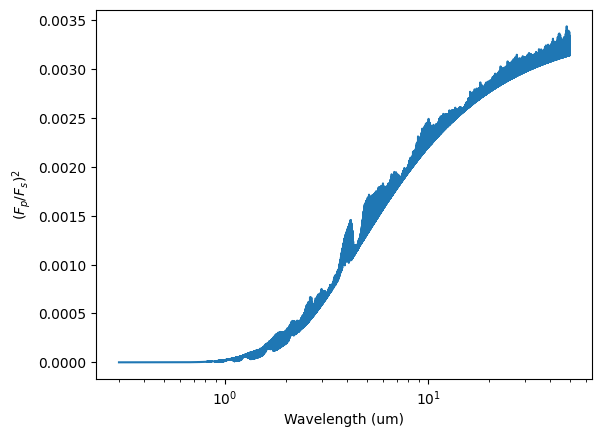

In [ ]:
wngrid, fpfs, tau, _ = em.model()

wlgrid = 10000/wngrid[::-1]
fpfs = fpfs[::-1]

plt.figure()
plt.plot(wlgrid, fpfs)
plt.xlabel("Wavelength (um)")
plt.ylabel("$(F_p/F_s)^2$")
plt.xscale("log")

# Inspecting the model

We can inspect various aspects of the model we've build by accesing its properties. For example, lets see the temperature profile:

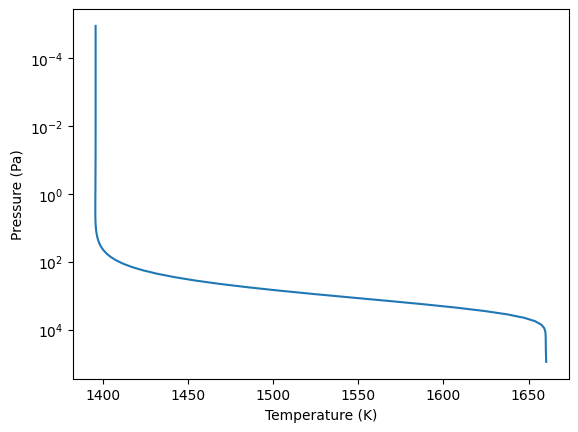

In [ ]:
plt.figure()
plt.plot(em.temperatureProfile, em.pressureProfile)
plt.xlabel("Temperature (K)")
plt.ylabel("Pressure (Pa)")
# Flip the Y axis
plt.gca().invert_yaxis()
plt.yscale("log")


Or even the chemical profile

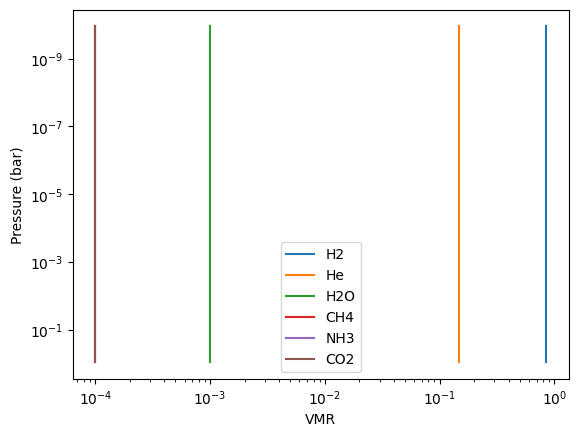

In [ ]:
plt.figure()

for x,gasname in enumerate(em.chemistry.gases):

    plt.plot(em.chemistry.mixProfile[x],em.pressureProfile/1e5,label=gasname)

plt.gca().invert_yaxis()
plt.yscale("log")
plt.xscale("log")
plt.xlabel("VMR")
plt.ylabel("Pressure (bar)")
plt.legend()
plt.show()

Or properties like the density, altitude, mean molecular weight

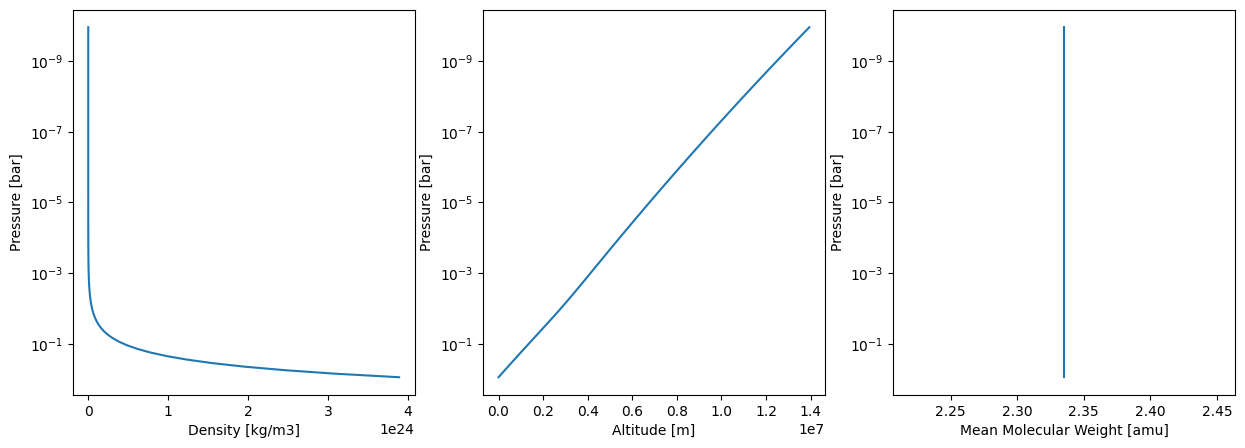

In [ ]:
from taurex.constants import AMU
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))

ax1.plot(em.densityProfile,em.pressureProfile/1e5)
ax1.invert_yaxis()
ax1.set_xlabel('Density [kg/m3]')
ax1.set_ylabel('Pressure [bar]')
ax1.set_yscale("log")

ax2.plot(em.altitudeProfile,em.pressureProfile/1e5)
ax2.invert_yaxis()
ax2.set_xlabel('Altitude [m]')
ax2.set_ylabel('Pressure [bar]')
ax2.set_yscale("log")
ax3.plot(em.chemistry.mu_profile/AMU,em.pressureProfile/1e5)
ax3.invert_yaxis()
ax3.set_xlabel('Mean Molecular Weight [amu]')
ax3.set_ylabel('Pressure [bar]')
ax3.set_yscale("log")

# Input file

Input files that are loaded into the ``taurex`` program can also be used to load in models.

For example, the transmission model we have defined has an equivalent version as an input file

🚀**TIP** We are generating an input file on the spot by doing this.

In [ ]:
%%sh
cat > input.par << EOF
[Global]
xsec_path = ./xsec
cia_path = ./cia


[Chemistry]
chemistry_type = taurex
fill_gases = H2,He
ratio = 0.1741

    [[H2O]]
    gas_type=constant
    mix_ratio = 1e-3

    [[CH4]]
    gas_type=constant
    mix_ratio = 1e-4

    [[NH3]]
    gas_type=constant
    mix_ratio = 1e-4

    [[CO2]]
    gas_type=constant
    mix_ratio = 1e-4

[Temperature]
profile_type = isothermal
T = 2000

[Pressure]
profile_type = Simple
atm_min_pressure = 1e-5
atm_max_pressure = 1e5
nlayers = 100

[Planet]
planet_type = Simple
planet_mass = 0.74
planet_radius = 1.38

[Star]
star_type = blackbody
temperature = 6117
radius = 1.16

[Model]
model_type = transmission

    [[Absorption]]
    [[CIA]]
    cia_pairs = H2-H2,H2-He
    [[Rayleigh]]

EOF
ls -l

total 16
drwxr-xr-x 2 root root 4096 Feb 12 12:25 cia
-rw-r--r-- 1 root root  736 Feb 12 14:05 input.par
drwxr-xr-x 1 root root 4096 Feb 10 14:25 sample_data
drwxr-xr-x 2 root root 4096 Feb 12 12:23 xsec


We can load in this par file like so:

In [ ]:
from taurex.parameter import ParameterParser

pp = ParameterParser()

pp.read("input.par")
pp.setup_globals()

tm = pp.generate_appropriate_model()

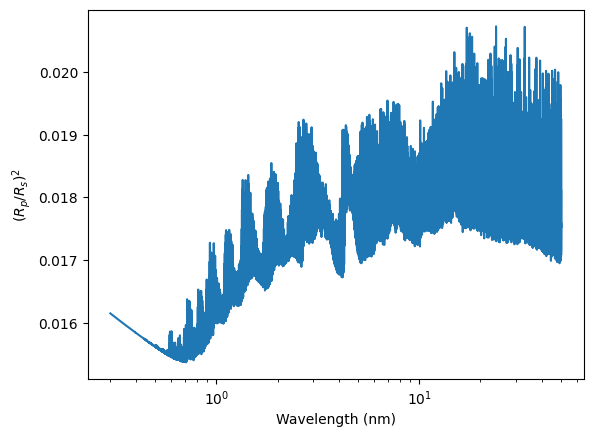

In [ ]:
tm.build()

wngrid, rprs, tau, _ = tm.model()

wlgrid = 10000/wngrid[::-1]
rprs = rprs[::-1]

plt.figure()
plt.plot(wlgrid, rprs)
plt.xscale('log')
plt.xlabel('Wavelength (nm)')
plt.ylabel('$(R_p/R_s)^2$')
plt.show()

# Updating the model

It is possible to update a models parameters after it has been built. Each model can use the square bracket notation ``[]`` to access parameters and modify them after the fact. This is one of TauREx-3's key features.

For example we can pump up the temperature to 6000 K:

In [61]:
tm["T"] = 6000.0

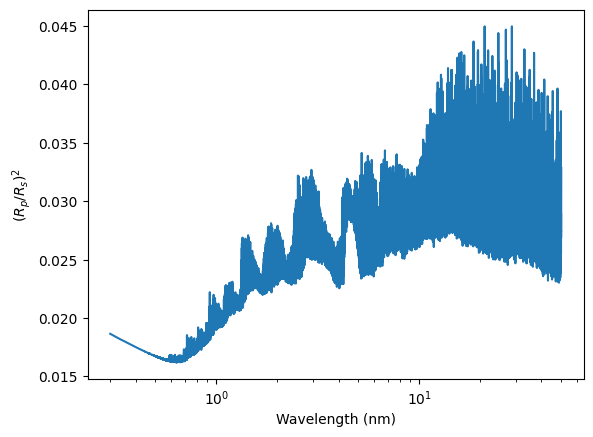

In [62]:
wngrid, rprs, tau, _ = tm.model()

wlgrid = 10000/wngrid[::-1]
rprs = rprs[::-1]

plt.figure()
plt.plot(wlgrid, rprs)
plt.xscale('log')
plt.xlabel('Wavelength (nm)')
plt.ylabel('$(R_p/R_s)^2$')
plt.show()

And remove water entirely:

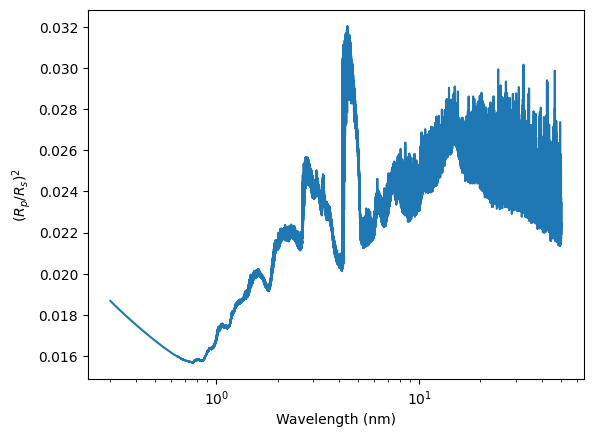

In [63]:
tm["H2O"] = 0.0


wngrid, rprs, tau, _ = tm.model()

wlgrid = 10000/wngrid[::-1]
rprs = rprs[::-1]

plt.figure()
plt.plot(wlgrid, rprs)
plt.xscale('log')
plt.xlabel('Wavelength (nm)')
plt.ylabel('$(R_p/R_s)^2$')
plt.show()

These brackets can also be used to see what the current variable is:

In [64]:
print(f"Temperature is at {tm['T']}")
print(f"VMR of CO2 is {tm['CO2']}")


Temperature is at 6000.0
VMR of CO2 is 0.0001


To see the full parameters available to modify we can use the ``fittingParameters`` attribute.

In [65]:
list(tm.fittingParameters.keys())

['planet_mass',
 'planet_radius',
 'planet_distance',
 'planet_sma',
 'distance',
 'atm_min_pressure',
 'atm_max_pressure',
 'T',
 'H2O',
 'CH4',
 'NH3',
 'CO2',
 'He_H2']

When we learn about retrievals we will understand why this feature of TauREx 3 is so important.